# PREDIKSI & PENGARUH INFLASI TERHADAP BESAR UMR DI INDONESIA 

### Import Library

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from modsim import *

### Load Dataset Gaji UMR

In [68]:
data_UMR = pd.read_csv("data_UMR.csv")
data_UMR.rename(columns={"REGION": "Provinsi", "SALARY": "Gaji", "YEAR": "Tahun"}, inplace=True)

In [69]:
data_UMR.head()

,Provinsi,Gaji,Tahun
0,ACEH,128000,1997
1,SUMATERA UTARA,151000,1997
2,SUMATERA BARAT,119000,1997
3,RIAU,151500,1997
4,JAMBI,119500,1997


In [70]:
data_UMR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Provinsi  870 non-null    object
 1   Gaji      870 non-null    int64 
 2   Tahun     870 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 20.5+ KB


### Mencari Tingkat Pertumbuhan

In [71]:
# Fungsi untuk menghitung growth rate
def calculate_growth_rate(df):
    df = df.sort_values('Tahun')
    df['Tingkat_Pertumbuhan'] = df['Gaji'].pct_change()
    return df

# Mengelompokkan data per region dan menghitung growth rate
data_growth_rate = data_UMR.groupby('Provinsi', as_index=False).apply(calculate_growth_rate).reset_index(drop=True)

# Menghapus baris pertama setiap region karena tidak memiliki data pertumbuhan tahun sebelumnya
data_growth_rate = data_growth_rate.dropna(subset=['Tingkat_Pertumbuhan'])

In [72]:
data_growth_rate.head()

,Provinsi,Gaji,Tahun,Tingkat_Pertumbuhan
1,ACEH,147000,1998,0.148438
2,ACEH,171000,1999,0.163265
3,ACEH,265000,2000,0.549708
4,ACEH,300000,2001,0.132075
5,ACEH,330000,2002,0.100000


In [73]:
# Menghitung rata-rata growth rate per region
average_growth_rates = data_growth_rate.groupby('Provinsi')['Tingkat_Pertumbuhan'].mean()
average_growth_rates

Provinsi
ACEH                    0.142402
BALI                    0.125702
BANTEN                  0.120525
BENGKULU                0.127561
DI YOGYAKARTA           0.126324
DKI JAKARTA             0.144576
GORONTALO               0.147273
INDONESIA               0.128960
JAMBI                   0.136362
JAWA BARAT              0.120623
JAWA TENGAH             0.122328
JAWA TIMUR              0.114990
KALIMANTAN BARAT        0.128828
KALIMANTAN SELATAN      0.137412
KALIMANTAN TENGAH       0.133506
KALIMANTAN TIMUR        0.353548
KALIMANTAN UTARA        0.059135
KEP. BANGKA BELITUNG    0.148013
KEP. RIAU               0.119211
LAMPUNG                 0.127948
MALUKU                  0.128668
MALUKU UTARA            0.132538
NUSA TENGGARA BARAT     0.130896
NUSA TENGGARA TIMUR     0.128028
PAPUA                   0.132672
PAPUA BARAT             0.090057
RIAU                    0.127770
SULAWESI BARAT          0.098345
SULAWESI SELATAN        0.147159
SULAWESI TENGAH         0.136626
S

### Visualisasi Tingkat Pertumbuhan Tahunan

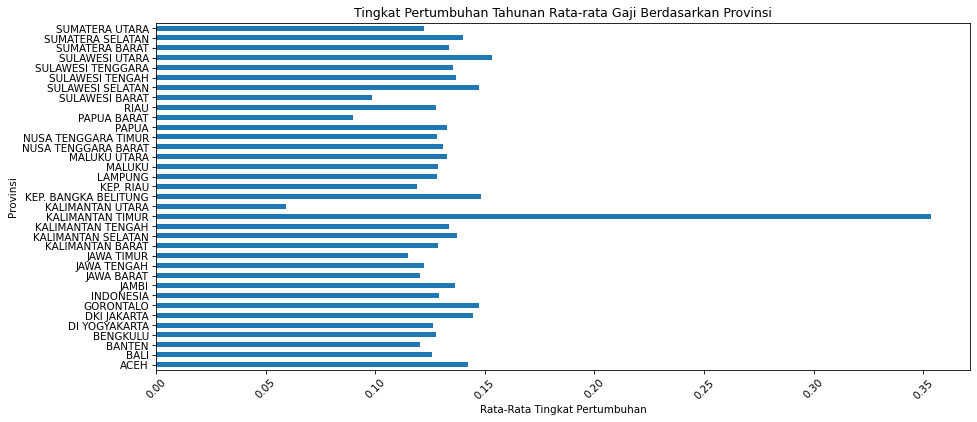

In [74]:
import matplotlib.pyplot as plt

# Plot average growth rate per region
average_growth_rates.plot(kind='barh', figsize=(14, 6))
plt.xlabel('Rata-Rata Tingkat Pertumbuhan')
plt.ylabel('Provinsi')
plt.title('Tingkat Pertumbuhan Tahunan Rata-rata Gaji Berdasarkan Provinsi')
plt.xticks(rotation=45)
plt.show()

### Load Dataset Inflasi

In [75]:
data_inflasi = pd.read_csv("data_inflasi.csv")
data_inflasi.drop(columns="GDP", inplace=True)
data_inflasi.rename(columns={"TAHUN": "Tahun", "INFLASI": "Inflasi"}, inplace=True)

In [76]:
data_inflasi.head()

,Tahun,Inflasi
0,1980,18.035430
1,1981,12.265909
2,1982,9.445424
3,1983,11.799741
4,1984,10.455035


In [77]:
data_inflasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tahun    43 non-null     int64  
 1   Inflasi  43 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 820.0 bytes


In [78]:
data_inflasi['Inflasi'] = data_inflasi['Inflasi'] / 100.0
data_inflasi.head()

,Tahun,Inflasi
0,1980,0.180354
1,1981,0.122659
2,1982,0.094454
3,1983,0.117997
4,1984,0.104550


### Penggabungan Data UMR dan Data Inflasi

In [79]:
# Menggabungkan data dengan operasi merge
data_merged = pd.merge(data_growth_rate, data_inflasi, on='Tahun', how='left')
data_merged

,Provinsi,Gaji,Tahun,Tingkat_Pertumbuhan,Inflasi
0,ACEH,147000,1998,0.148438,0.584510
1,ACEH,171000,1999,0.163265,0.204778
2,ACEH,265000,2000,0.549708,0.036886
3,ACEH,300000,2001,0.132075,0.115001
4,ACEH,330000,2002,0.100000,0.119001
...,...,...,...,...,...
830,SUMATERA UTARA,2132189,2018,0.087101,0.031983
831,SUMATERA UTARA,2303403,2019,0.080300,0.030306
832,SUMATERA UTARA,2499423,2020,0.085100,0.019210
833,SUMATERA UTARA,2499423,2021,0.000000,0.015601


### Mengambil Data Provinsi Jawa Timur

In [80]:
data_jawa_timur = data_merged[data_merged['Provinsi'] == 'JAWA TIMUR']
data_jawa_timur

,Provinsi,Gaji,Tahun,Tingkat_Pertumbuhan,Inflasi
273,JAWA TIMUR,143000,1998,0.079245,0.584510
274,JAWA TIMUR,170500,1999,0.192308,0.204778
275,JAWA TIMUR,214500,2000,0.258065,0.036886
276,JAWA TIMUR,220000,2001,0.025641,0.115001
277,JAWA TIMUR,245000,2002,0.113636,0.119001
278,JAWA TIMUR,274000,2003,0.118367,0.067573
279,JAWA TIMUR,310000,2004,0.131387,0.060641
280,JAWA TIMUR,340000,2005,0.096774,0.104532
281,JAWA TIMUR,390000,2006,0.147059,0.131087
282,JAWA TIMUR,448500,2007,0.150000,0.064066


### Visualisasi Perbandingan Inflasi dan Tingkat Pertumbuhan di Jawa Timur

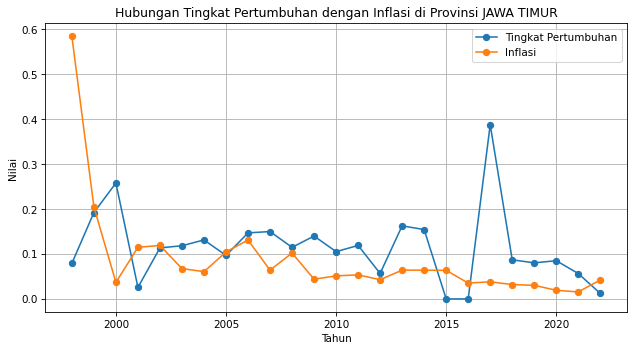

In [81]:
plt.figure(figsize=(10, 5))
plt.plot(data_jawa_timur['Tahun'], data_jawa_timur['Tingkat_Pertumbuhan'], marker='o', label='Tingkat Pertumbuhan')
plt.plot(data_jawa_timur['Tahun'], data_jawa_timur['Inflasi'], marker='o', label='Inflasi')

plt.title('Hubungan Tingkat Pertumbuhan dengan Inflasi di Provinsi JAWA TIMUR')
plt.xlabel('Tahun')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.show()

### Membuat Objek State dan System dari 1998 - 2022

In [82]:
# Mendefinisikan fungsi untuk membuat state dan system
def make_state_and_system(data, provinsi):
    data_provinsi = data[data['Provinsi'] == provinsi]
    tahun_awal = data_provinsi["Tahun"].min()
    data_awal = data_provinsi[data_provinsi["Tahun"] == tahun_awal].iloc[0]

    state = State(
        nama_provinsi = provinsi,
        tahun_awal_prediksi = tahun_awal,
        tahun_akhir_prediksi = 2022
    )

    system = System(
        tahun = tahun_awal,
        data_awal = data_provinsi,
        gaji_terkini = data_awal["Gaji"],
        inflasi_terkini = data_awal["Inflasi"],
        tingkat_pertumbuhan_terkini = data_awal["Tingkat_Pertumbuhan"]
    )

    return state, system

# Contoh penggunaan
state, system = make_state_and_system(data_merged, 'JAWA TIMUR')

print("State:")
print(state)
print("\nSystem:")
print(system)

State:
nama_provinsi           JAWA TIMUR
tahun_awal_prediksi           1998
tahun_akhir_prediksi          2022
Name: state, dtype: object

System:
System(tahun=1998, data_awal=       Provinsi     Gaji  Tahun  Tingkat_Pertumbuhan   Inflasi
273  JAWA TIMUR   143000   1998             0.079245  0.584510
274  JAWA TIMUR   170500   1999             0.192308  0.204778
275  JAWA TIMUR   214500   2000             0.258065  0.036886
276  JAWA TIMUR   220000   2001             0.025641  0.115001
277  JAWA TIMUR   245000   2002             0.113636  0.119001
278  JAWA TIMUR   274000   2003             0.118367  0.067573
279  JAWA TIMUR   310000   2004             0.131387  0.060641
280  JAWA TIMUR   340000   2005             0.096774  0.104532
281  JAWA TIMUR   390000   2006             0.147059  0.131087
282  JAWA TIMUR   448500   2007             0.150000  0.064066
283  JAWA TIMUR   500000   2008             0.114827  0.102267
284  JAWA TIMUR   570000   2009             0.140000  0.043864
285 

### Membuat Fungsi Update Gaji menggunakan Rumus pada PP Nomor 51 Tahun 2023 Pasal 26 Ayat 4

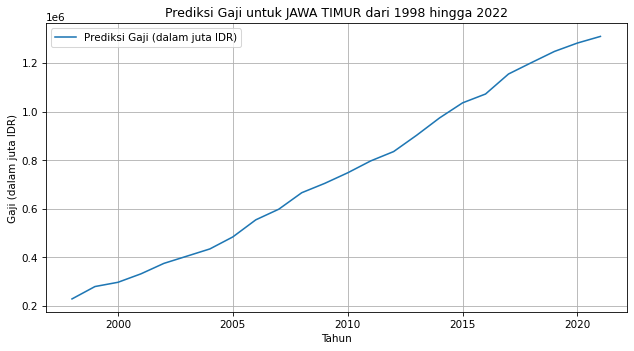

In [83]:
def update_func(state, system, kontribusi_tenaga_kerja):
    """Update Gaji berdasarkan inflasi dan tingkat pertumbuhan dengan faktor kontribusi tenaga kerja terhadap pertumbuhan ekonomi provinsi atau kabupaten/kota."""
    # PP Nomor 51 Tahun 2023 Pasal 26 Ayat 4
    # UM(t+1) = UM(t); + Nilai Penyesuaian UM(t+1)
    # Nilai Penyesuaian UM(t+1) = Inflasi + (PE * a)) * UM(t)
    system.inflasi_terkini = float(system.data_awal[system.data_awal["Tahun"] == system.tahun]["Inflasi"].iloc[0])
    system.tingkat_pertumbuhan_terkini = float(system.data_awal[system.data_awal["Tahun"] == system.tahun]["Tingkat_Pertumbuhan"].iloc[0])
    system.gaji_terkini += system.gaji_terkini * (system.inflasi_terkini + (system.tingkat_pertumbuhan_terkini * kontribusi_tenaga_kerja))
    system.tahun += 1
    return int(system.gaji_terkini)

def run_simulation(state, system, kontribusi_tenaga_kerja):
    """Simulasi prediksi Gaji dalam juta Rupiah."""
    results = TimeSeries()
    
    for tahun in range(state.tahun_awal_prediksi, state.tahun_akhir_prediksi):
        prediksi_gaji = update_func(state, system, kontribusi_tenaga_kerja)
        results[tahun] = prediksi_gaji
        system.gaji_terkini = prediksi_gaji
        
    return results

state, system = make_state_and_system(data_merged, 'JAWA TIMUR')
results = run_simulation(state, system, 0.1)

# Visualisasi
plt.figure(figsize=(10, 5))
plt.plot(results, label='Prediksi Gaji (dalam juta IDR)')
plt.title('Prediksi Gaji untuk JAWA TIMUR dari {} hingga {}'.format(state.tahun_awal_prediksi, state.tahun_akhir_prediksi))
plt.xlabel('Tahun')
plt.ylabel('Gaji (dalam juta IDR)')
plt.legend()
plt.grid(True)
plt.show()

In [84]:
df = pd.DataFrame({
    'Tahun': results.index,
    'Gaji': results.values
})

df

,Tahun,Gaji
0,1998,227718
1,1999,278728
2,2000,296202
3,2001,331025
4,2002,374179
5,2003,403892
6,2004,433690
7,2005,483221
8,2006,553671
9,2007,597447


### Visualisasi Perbandingan Gaji Asli dan Prediksi Gaji dari Model yang dibuat pada Tahun 1998 - 2022

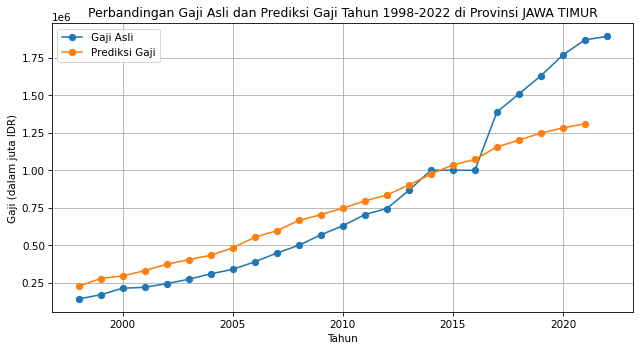

In [85]:
data_jawa_timur = data_merged[data_merged['Provinsi'] == 'JAWA TIMUR']

plt.figure(figsize=(10, 5))
plt.plot(data_jawa_timur['Tahun'], data_jawa_timur['Gaji'], marker='o', label='Gaji Asli')
plt.plot(df["Tahun"], df["Gaji"], marker='o', label='Prediksi Gaji')

plt.title('Perbandingan Gaji Asli dan Prediksi Gaji Tahun 1998-2022 di Provinsi JAWA TIMUR')
plt.xlabel('Tahun')
plt.ylabel('Gaji (dalam juta IDR)')
plt.legend()
plt.grid(True)
plt.show()

### Membuat Objek State dan System dari 2023 - 2032

In [86]:
# Mendefinisikan fungsi untuk membuat state dan system
def make_state_and_system(data, provinsi):
    data_provinsi = data[data['Provinsi'] == provinsi]
    tahun_saat_ini = data_provinsi["Tahun"].max()
    data_terakhir = data_provinsi[data_provinsi["Tahun"] == tahun_saat_ini].iloc[0]

    # Membuat objek State
    state = State(
        nama_provinsi = provinsi,
        tahun_awal_prediksi = tahun_saat_ini + 1,
        tahun_akhir_prediksi = tahun_saat_ini + 10  # Misalnya kita ingin memprediksi 10 tahun ke depan
    )

    # Membuat objek System
    system = System(
        gaji_terkini = data_terakhir["Gaji"],
        inflasi_terkini = data_terakhir["Inflasi"],
        tingkat_pertumbuhan_terkini = data_terakhir["Tingkat_Pertumbuhan"]
    )

    return state, system

# Contoh penggunaan
state, system = make_state_and_system(data_merged, 'JAWA TIMUR')

print("State:")
print(state)
print("\nSystem:")
print(system)

State:
nama_provinsi           JAWA TIMUR
tahun_awal_prediksi           2023
tahun_akhir_prediksi          2032
Name: state, dtype: object

System:
System(gaji_terkini=1891567, inflasi_terkini=0.042094638340000004, tingkat_pertumbuhan_terkini=0.012195141528389852)


### Membuat Fungsi Update Gaji dari Tahun 2023 - 2032

Time
2023    1973498
2024    2058978
2025    2148160
2026    2241205
2027    2338280
2028    2439560
2029    2545227
2030    2655471
2031    2770490
2032    2890491
Name: Quantity, dtype: int64


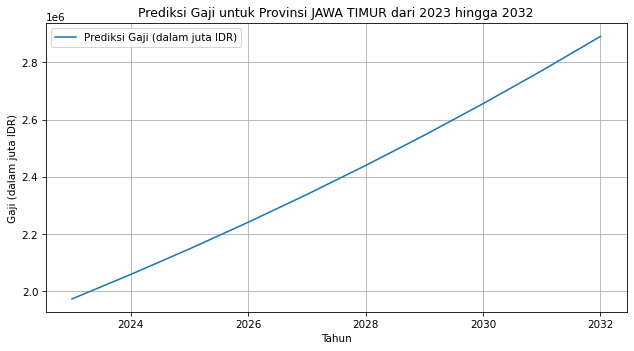

In [87]:
def update_func(state, system, kontribusi_tenaga_kerja):
    """Update Gaji berdasarkan inflasi dan growth rate dengan faktor kontribusi tenaga kerja terhadap pertumbuhan ekonomi provinsi atau kabupaten/kota."""
    system.gaji_terkini += system.gaji_terkini * (system.inflasi_terkini + (system.tingkat_pertumbuhan_terkini * kontribusi_tenaga_kerja))
    return int(system.gaji_terkini)

def run_simulation(state, system, kontribusi_tenaga_kerja):
    """Simulasi prediksi Gaji dalam juta Rupiah."""
    results = TimeSeries()
    
    for tahun in range(state.tahun_awal_prediksi, state.tahun_akhir_prediksi + 1):
        prediksi_gaji = update_func(state, system, kontribusi_tenaga_kerja)
        results[tahun] = prediksi_gaji
        system.gaji_terkini = prediksi_gaji
        
    return results

state, system = make_state_and_system(data_merged, 'JAWA TIMUR')
results = run_simulation(state, system, 0.1)
print(results)

# Visualisasi
plt.figure(figsize=(10, 5))
plt.plot(results, label='Prediksi Gaji (dalam juta IDR)')
plt.title('Prediksi Gaji untuk Provinsi JAWA TIMUR dari {} hingga {}'.format(state.tahun_awal_prediksi, state.tahun_akhir_prediksi))
plt.xlabel('Tahun')
plt.ylabel('Gaji (dalam juta IDR)')
plt.legend()
plt.grid(True)
plt.show()

### Membuat Sweep Series terhadap Kontribusi Tenaga Kerja

Parameter
0.1    2890491
0.2    2924458
0.3    2958781
0.4    2993466
0.5    3028515
0.6    3063939
0.7    3099730
0.8    3135899
0.9    3172446
1.0    3209376
Name: Metric, dtype: int64


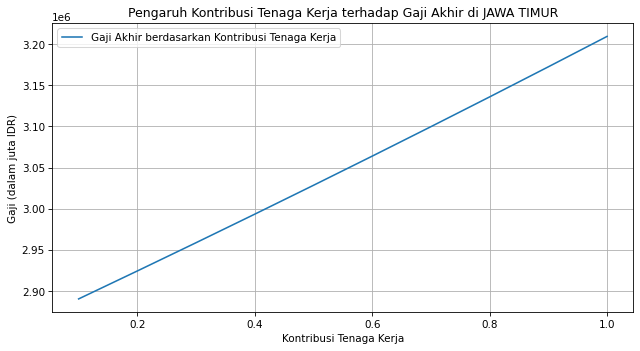

In [88]:
def sweep_growth_factor(state, system):
    sweep_results = SweepSeries()
    
    # Gunakan np.linspace untuk menghasilkan nilai kontribusi dari min_kontribusi hingga max_kontribusi dengan langkah
    kontribusi_tenaga_kerja = np.linspace(0.1, 1.0, 10)
    
    for kontribusi in kontribusi_tenaga_kerja:
        # Backup nilai gaji terkini untuk mengembalikan setelah simulasi setiap kontribusi
        initial_gaji = system.gaji_terkini
        
        # Jalankan simulasi dengan kontribusi tenaga kerja saat ini
        results = run_simulation(state, system, kontribusi)
        
        # Ambil nilai gaji terakhir dari hasil simulasi
        sweep_results[kontribusi] = results[state.tahun_akhir_prediksi]
        
        # Reset gaji terkini ke nilai awal sebelum simulasi berikutnya
        system.gaji_terkini = initial_gaji
    
    return sweep_results

state, system = make_state_and_system(data_merged, 'JAWA TIMUR')
sweep_results = sweep_growth_factor(state, system)
print(sweep_results)

plt.figure(figsize=(10, 5))
plt.plot(sweep_results, label='Gaji Akhir berdasarkan Kontribusi Tenaga Kerja')
plt.title('Pengaruh Kontribusi Tenaga Kerja terhadap Gaji Akhir di JAWA TIMUR')
plt.xlabel('Kontribusi Tenaga Kerja')
plt.ylabel('Gaji (dalam juta IDR)')
plt.legend()
plt.grid(True)
plt.show()